In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'): # os.walk('/tmp/working')
    for filename in filenames:
        print(os.path.join(dirname, filename))


./gearbox-fault-logistic-regression.ipynb
./gearbox-fault-raw-datasets-logistic-regression.ipynb
./test.ipynb
./.ipynb_checkpoints/gearbox-fault-logistic-regression-checkpoint.ipynb
./.ipynb_checkpoints/test-checkpoint.ipynb
./input/gearbox-fault-diagnosis-stacked-datasets/h30hz.csv
./input/gearbox-fault-diagnosis-stacked-datasets/b30hz.csv
./input/gearbox-fault-diagnosis-stdev-of-accelerations/h30hz_stdev.csv
./input/gearbox-fault-diagnosis-stdev-of-accelerations/b30hz_stdev.csv


# Exploring the dataset

In [2]:
healthyDataset = pd.read_csv("./input/gearbox-fault-diagnosis-stdev-of-accelerations/h30hz_stdev.csv")
healthyDataset.describe()

,a1,a2,a3,a4,load,failure
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.0
mean,7.314851,4.417099,4.072112,4.456568,45.817641,0.0
std,1.031318,0.344621,0.575772,0.779972,28.314953,0.0
min,4.980391,3.440168,2.783320,2.809421,0.000000,0.0
25%,6.497794,4.190476,3.551695,3.776468,20.000000,0.0
50%,7.383831,4.417185,4.182972,4.597070,50.000000,0.0
75%,8.079101,4.664136,4.534758,5.084483,70.000000,0.0
max,10.699518,5.550383,5.203767,6.230122,90.000000,0.0


In [3]:
brokenDataset = pd.read_csv("./input/gearbox-fault-diagnosis-stdev-of-accelerations/b30hz_stdev.csv")
brokenDataset.describe()

,a1,a2,a3,a4,load,failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.0
mean,4.549605,4.367361,3.782880,4.330454,45.4700,1.0
std,0.714451,0.467563,0.461174,0.745047,29.0176,0.0
min,3.024852,3.270005,2.651898,2.557683,0.0000,1.0
25%,3.917570,4.017280,3.414176,3.670111,20.0000,1.0
50%,4.617843,4.330344,3.862336,4.417947,50.0000,1.0
75%,5.131351,4.713500,4.141936,4.930730,70.0000,1.0
max,6.224742,5.712389,4.863133,6.276127,90.0000,1.0


## Join healthy & broken datasets in a single dataframe

In [4]:
dataset = pd.concat([healthyDataset, brokenDataset], axis=0)
dataset.describe()

,a1,a2,a3,a4,load,failure
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,5.938422,4.392342,3.928144,4.393794,45.644599,0.497760
std,1.643300,0.411096,0.541435,0.765202,28.660242,0.500119
min,3.024852,3.270005,2.651898,2.557683,0.000000,0.000000
25%,4.621894,4.087327,3.478211,3.725348,20.000000,0.000000
50%,5.625339,4.384351,3.986889,4.520270,50.000000,0.000000
75%,7.387280,4.681322,4.335109,5.007348,70.000000,1.000000
max,10.699518,5.712389,5.203767,6.276127,90.000000,1.000000


## Rows count per load
Overall, for both healthy & broken

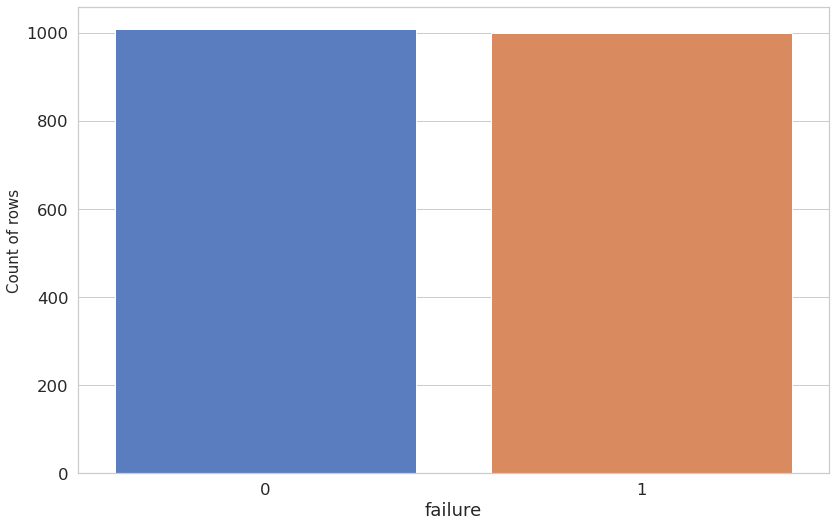

In [5]:
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 12, 8

overall = sns.countplot(x='failure',data=dataset)
overall.set_ylabel('Count of rows',fontsize=15)
plt.show()

Text(0, 0.5, 'Count of rows')

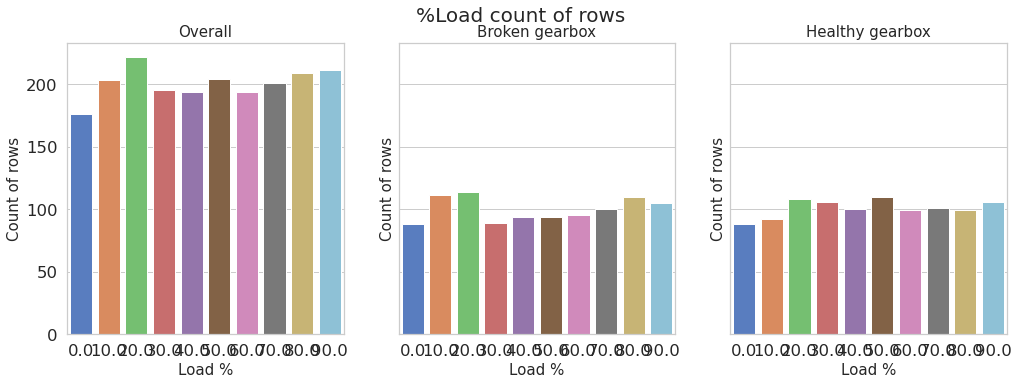

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
   
fig.suptitle('%Load count of rows', fontsize=20)
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

#Overall
overall = sns.countplot(ax=axes[0], x='load',data=dataset)
axes[0].set_title('Overall', fontsize=15)
overall.set_xlabel('Load %',fontsize=15)
overall.set_ylabel('Count of rows',fontsize=15)

# Broken gearbox
broken = sns.countplot(ax=axes[1], x='load',data=brokenDataset)
axes[1].set_title('Broken gearbox', fontsize=15)
broken.set_xlabel('Load %',fontsize=15)
broken.set_ylabel('Count of rows',fontsize=15)

# Healthy gearbox
heathly = sns.countplot(ax=axes[2], x='load',data=healthyDataset)
axes[2].set_title('Healthy gearbox' , fontsize=15)
heathly.set_xlabel('Load %',fontsize=15)
heathly.set_ylabel('Count of rows',fontsize=15)

In [7]:
dataset["load"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
995    90.0
996    90.0
997    90.0
998    90.0
999    90.0
Name: load, Length: 2009, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

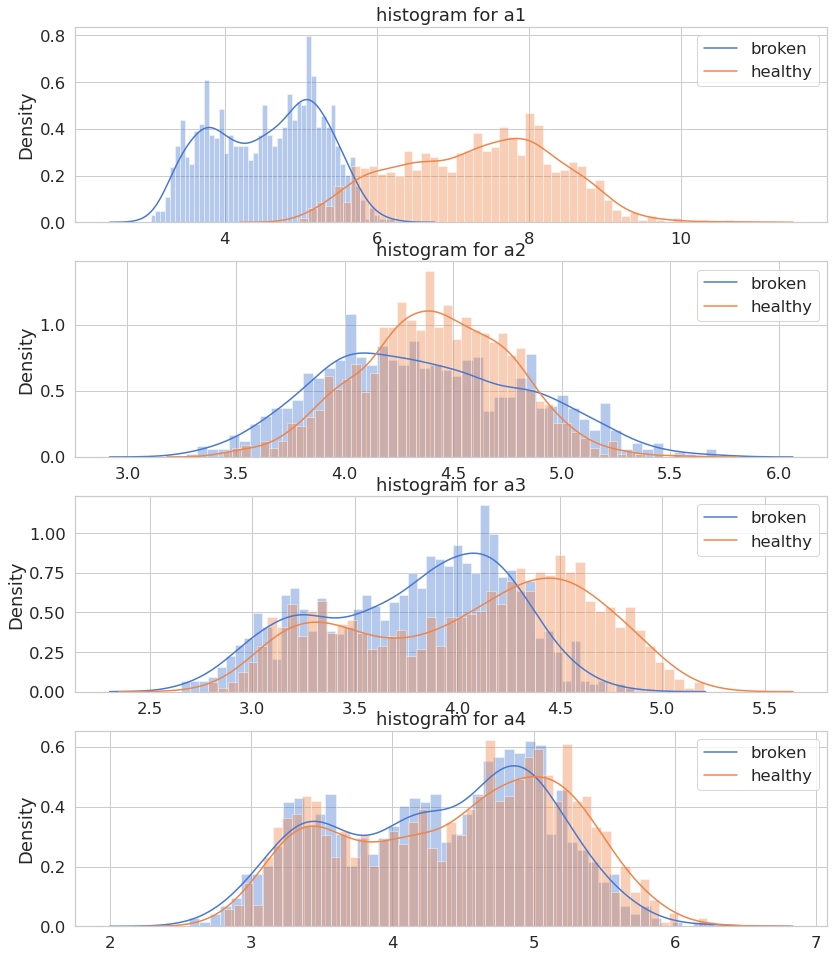

In [8]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.failure == 1], bins=50)
    sns.distplot(dataset[cn][dataset.failure == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(['broken', 'healthy'])
    ax.set_title('histogram for ' + str(cn))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

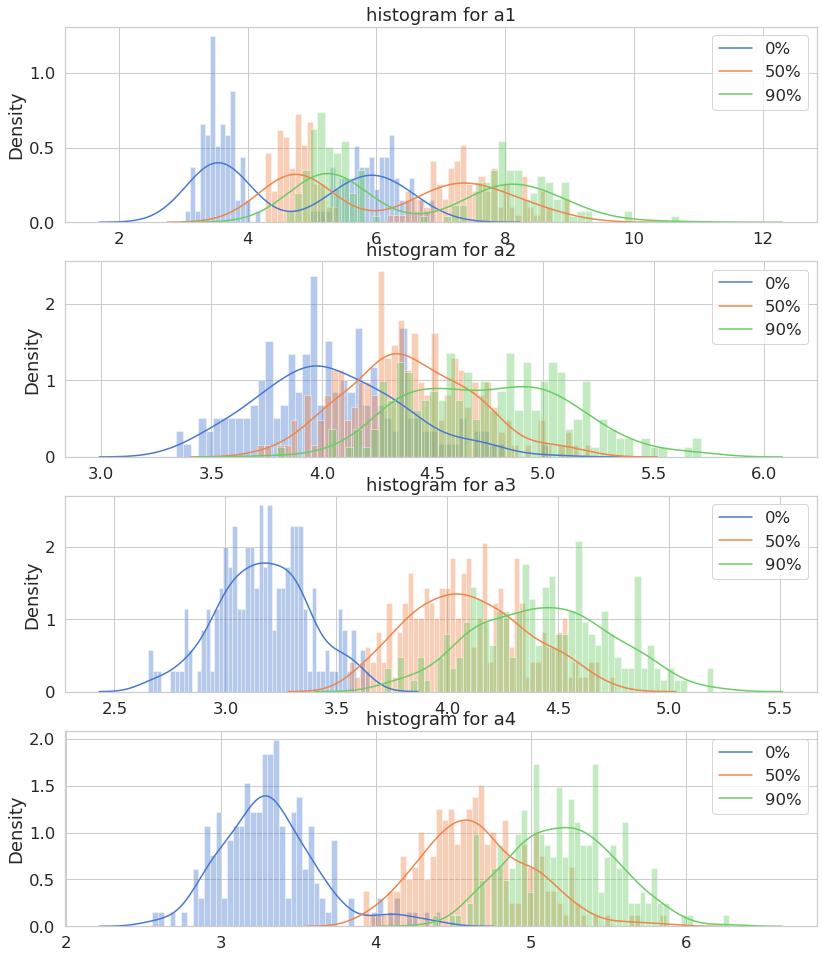

In [9]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

## Correlation matrix

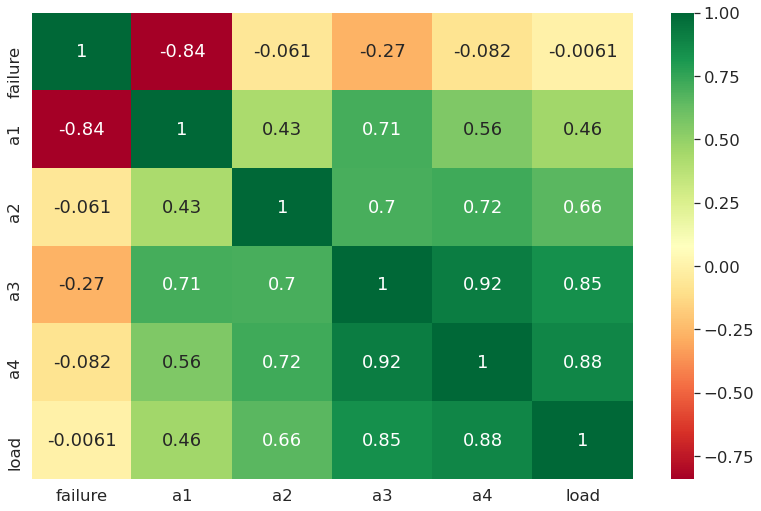

In [10]:
columns = ['failure','a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# Logistic regression

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Predictor variable (features)
columns = ['a1', 'a2', 'a3', 'a4', 'load']
X = dataset[columns]
# Target variable: Failure (boolean)
y = dataset.iloc[:,-1]

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: failure, Length: 2009, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 553 to 684
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      1607 non-null   float64
 1   a2      1607 non-null   float64
 2   a3      1607 non-null   float64
 3   a4      1607 non-null   float64
 4   load    1607 non-null   float64
dtypes: float64(5)
memory usage: 75.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 887 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      402 non-null    float64
 1   a2      402 non-null    float64
 2   a3      402 non-null    float64
 3   a4      402 non-null    float64
 4   load    402 non-null    float64
dtypes: float64(5)
memory usage: 18.8 KB
None


In [16]:
print( type(y_train), y_train)
print( type(y_test), y_test)

<class 'pandas.core.series.Series'> 553    0
248    1
360    0
810    1
300    1
      ..
835    0
207    1
644    1
559    0
684    0
Name: failure, Length: 1607, dtype: int64
<class 'pandas.core.series.Series'> 887    1
175    0
669    1
547    1
766    1
      ..
397    1
298    0
52     0
945    1
249    1
Name: failure, Length: 402, dtype: int64


In [17]:
# Import logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Setup the model
logis = LogisticRegression(max_iter=1000)

# Train the model
logis.fit(X_train,y_train)

# Predict Outcome for the test set
y_pred = logis.predict(X_test)

## Check predictions

In [18]:
# Mean of features in whole brokenDataset
data = {'a1': [4.6], 'a2': [4.36], 'a3': [3.78], 'a4': [4.33], 'load': [45.47]}
X_valid = pd.DataFrame(data)
print(X_valid)

y_valid = logis.predict(X_valid)
print("\n For this set of features, gearbox should be (0 healthy, 1 broken): ", y_valid[0])

    a1    a2    a3    a4   load
0  4.6  4.36  3.78  4.33  45.47

 For this set of features, gearbox should be (0 healthy, 1 broken):  1


In [19]:
# Mean of features in whole healthyDataset
data = {'a1': [7.31], 'a2': [4.42], 'a3': [4.07], 'a4': [4.46], 'load': [45.81]}
X_valid = pd.DataFrame(data)
print(X_valid)

y_valid = logis.predict(X_valid)
print("\n For this set of features, gearbox should be (0 healthy, 1 broken): ", y_valid[0])

     a1    a2    a3    a4   load
0  7.31  4.42  4.07  4.46  45.81

 For this set of features, gearbox should be (0 healthy, 1 broken):  0


## Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[205,   0],
       [  0, 197]])

In [21]:
print( logis.score(X_test,y_test) , logis.score(X_train,y_train) )

1.0 1.0


## Classification report

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       197

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



## ROC curve

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


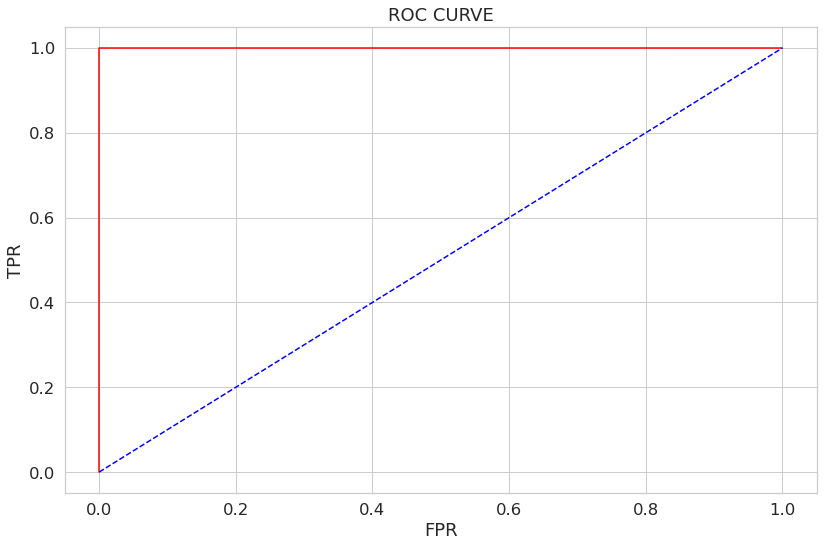

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
fpr,tpr,_= roc_curve(logis.predict(X),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='red',Label='ROC_Curve')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()